# Iris Flower Data Set 03 - Decision Tree

Although decision tree is not on the official scikit-learn flowchart, I figure it might be interesting to try Decision Tree on this data set.

## Train Decision Trees with two variables

First, we perform the usual business — load the data set and train the models.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Iris Flower Data Set
iris = datasets.load_iris()
x1 = iris.data[:, :2]   # grab the first two traits
x2 = iris.data[:, 2:]   # grab the last two traits
y = iris.target         # the corresponding iris species

# Train the Decision Tree
model1  = DecisionTreeClassifier(max_depth=3).fit(x1, y)
model2  = DecisionTreeClassifier(max_depth=3).fit(x2, y)

Here, we can reuse the code from *Iris Flower Data Set 02 - Linear SVM* to visualize the models.

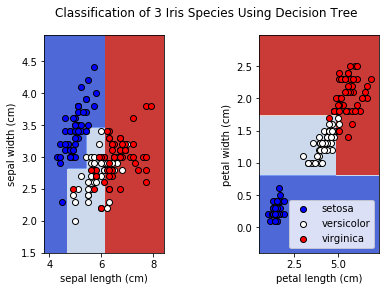

In [2]:
# Create the scatter plots

models = [model1, model2]

x_labels = [iris.feature_names[0], iris.feature_names[2]]
y_labels = [iris.feature_names[1], iris.feature_names[3]]

xs = [x1[:, 0], x2[:, 0]]
ys = [x1[:, 1], x2[:, 1]]

n_classes = len(iris.target_names)
plot_colours = "bwr"

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(left = 0.125, wspace=0.8)

for clf, X, Y, nx, ny, ax in zip(models, xs, ys, x_labels, y_labels, sub.flatten()):
    xx, yy = make_meshgrid(X, Y)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm)

    for i, colour in zip(range(n_classes), plot_colours):
        idx = np.where(iris.target == i)
        ax.scatter(X[idx], Y[idx],label=iris.target_names[i], c=[colour], edgecolors = 'k')
        
    ax.set_xlabel(nx)
    ax.set_ylabel(ny)

fig.suptitle("Classification of 3 Iris Species Using Decision Tree")
plt.legend()
plt.show()

It seems like Decision Trees are good classifiers for this data set as well. Let's evaluate their performance.

In [3]:
def success_rate(x, y, model):
    p = model.predict(x)
    return round(sum(p == y)/len(y), 2)

print("Model 1 success rate:", success_rate(x1, y, model1))
print("Model 2 success rate:", success_rate(x2, y, model2))

Model 1 success rate: 0.81
Model 2 success rate: 0.97


## Train a Linear SVM with all four variables

Now, let's train an ultimate model with all four variables. Again, the data set is split into training set and testing set. We evaluate the performance of Model X.

In [4]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.9, random_state=42)

# Train the ultimate model
model_x = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print("Model X success rate on training data:", success_rate(X_train, y_train, model_x))
print("Model X success rate on testing data:", success_rate(X_test, y_test, model_x))

Model X success rate on training data: 0.97
Model X success rate on testing data: 1.0


Dang! It also yields a splendid result. Even more, unlike the model in *Iris Flower Data Set 02 - Linear SVM*, there is a way for us to visualize this result.

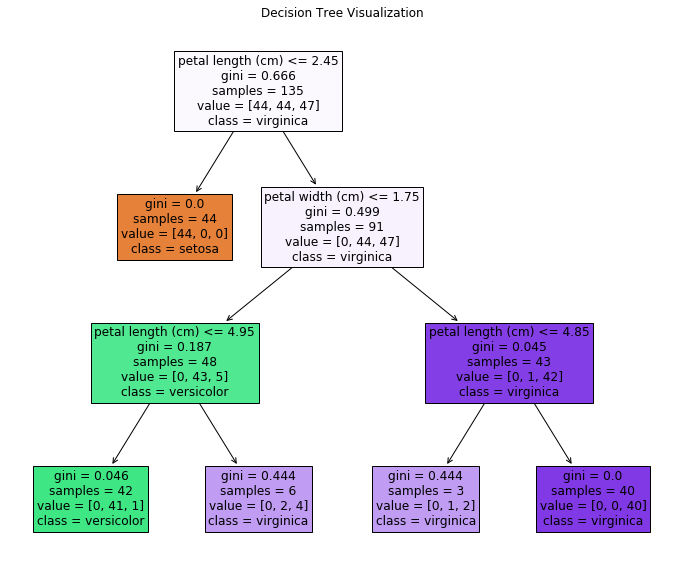

In [5]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 10))
plot_tree(model_x, ax=ax, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()

Here, we generate a flowchart. Besides being a classifier, a good Decision Tree can be made into dichotomous key. This makes Decision Tree extremely useful in biology (particularly taxonomy).